# Hidangan Asia dan India yang Lezat

## Pendahuluan

Masakan Asia dan India dikenal karena rasa dan aroma yang kaya. Dari kari pedas hingga mie goreng yang menggugah selera, ada sesuatu untuk semua orang. Artikel ini akan membahas beberapa hidangan populer dari berbagai wilayah di Asia dan India.

## Hidangan Populer

### 1. Nasi Goreng

Nasi goreng adalah hidangan khas Asia Tenggara yang terbuat dari nasi yang digoreng dengan berbagai bumbu, sayuran, dan sering kali ditambahkan daging atau seafood. Hidangan ini mudah disesuaikan dengan selera masing-masing.

### 2. Kari Ayam

Kari ayam adalah hidangan India yang terkenal di seluruh dunia. Dibuat dengan potongan ayam yang dimasak dalam saus berbumbu yang kaya, biasanya disajikan dengan nasi atau roti seperti naan.

### 3. Sushi

Sushi adalah hidangan Jepang yang terdiri dari nasi yang dibumbui dengan cuka, dipadukan dengan berbagai bahan seperti ikan mentah, sayuran, dan rumput laut. Hidangan ini sering disajikan dengan kecap asin, wasabi, dan jahe acar.

### 4. Pad Thai

Pad Thai adalah mie goreng khas Thailand yang dimasak dengan saus asam manis, telur, tahu, dan sering kali ditambahkan udang atau ayam. Hidangan ini biasanya dihiasi dengan kacang tanah cincang dan perasan jeruk nipis.

### 5. Samosa

Samosa adalah camilan khas India yang berbentuk segitiga, diisi dengan kentang berbumbu, kacang polong, atau daging cincang, lalu digoreng hingga renyah. Samosa sering disajikan dengan saus chutney.

## Tips Memasak

- **Gunakan bahan segar:** Bahan segar akan meningkatkan rasa dan kualitas hidangan Anda.
- **Eksperimen dengan bumbu:** Jangan takut mencoba berbagai kombinasi bumbu untuk menemukan rasa yang Anda sukai.
- **Ikuti resep tradisional:** Untuk mendapatkan rasa autentik, cobalah mengikuti resep tradisional dari wilayah asal hidangan.

## Kesimpulan

Masakan Asia dan India menawarkan berbagai pilihan rasa yang unik dan menggugah selera. Dengan mencoba hidangan-hidangan ini, Anda dapat menjelajahi budaya dan tradisi kuliner yang kaya dari wilayah tersebut. Selamat mencoba dan menikmati!


Instal Imblearn yang akan memungkinkan SMOTE. Ini adalah paket Scikit-learn yang membantu menangani data yang tidak seimbang saat melakukan klasifikasi. (https://imbalanced-learn.org/stable/)


In [1]:
pip install imblearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
df  = pd.read_csv('../../data/cuisines.csv')

Dataset ini mencakup 385 kolom yang menunjukkan berbagai jenis bahan dalam berbagai masakan dari satu set masakan tertentu.


In [4]:
df.head()

Unnamed: 0 cuisine  almond  angelica  anise  anise_seed  apple  \
0          65  indian       0         0      0           0      0   
1          66  indian       1         0      0           0      0   
2          67  indian       0         0      0           0      0   
3          68  indian       0         0      0           0      0   
4          69  indian       0         0      0           0      0   

   apple_brandy  apricot  armagnac  ...  whiskey  white_bread  white_wine  \
0             0        0         0  ...        0            0           0   
1             0        0         0  ...        0            0           0   
2             0        0         0  ...        0            0           0   
3             0        0         0  ...        0            0           0   
4             0        0         0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 385 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [6]:
df.cuisine.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

Tampilkan masakan dalam grafik batang


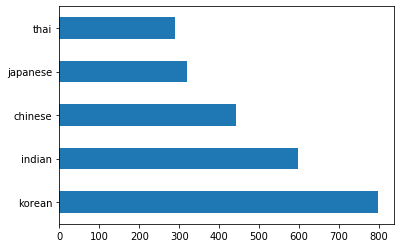

In [7]:
df.cuisine.value_counts().plot.barh()

In [8]:

thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [9]:
def create_ingredient_df(df):
    # transpose df, drop cuisine and unnamed rows, sum the row to get total for ingredient and add value header to new df
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    # drop ingredients that have a 0 sum
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    # sort df
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df


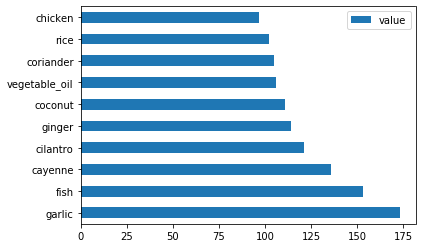

In [10]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

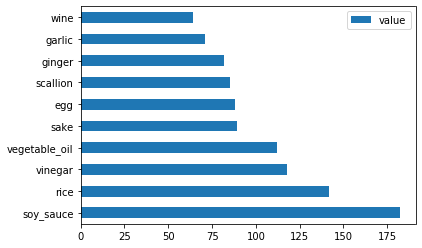

In [11]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

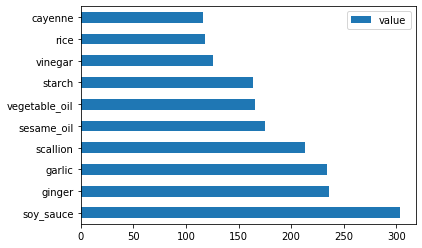

In [12]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

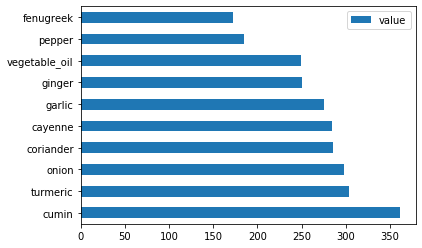

In [13]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

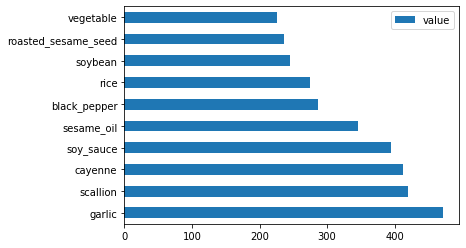

In [14]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

In [15]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()


almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

Seimbangkan data dengan oversampling SMOTE ke kelas tertinggi. Baca lebih lanjut di sini: https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html


In [16]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [17]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: korean      799
chinese     799
japanese    799
indian      799
thai        799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [18]:
transformed_feature_df.head()

almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   
3       0         0      0           0      0             0        0   
4       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   
3         0          0          0  ...        0            0           0   
4         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  
3                        0     0     0    0      0       0         0  
4                        0     0     0    0      0       1         0  

[5 rows x 380 columns]

In [19]:
# export transformed data to new df for classification
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df

cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0     indian       0         0      0           0      0             0   
1     indian       1         0      0           0      0             0   
2     indian       0         0      0           0      0             0   
3     indian       0         0      0           0      0             0   
4     indian       0         0      0           0      0             0   
...      ...     ...       ...    ...         ...    ...           ...   
3990    thai       0         0      0           0      0             0   
3991    thai       0         0      0           0      0             0   
3992    thai       0         0      0           0      0             0   
3993    thai       0         0      0           0      0             0   
3994    thai       0         0      0           0      0             0   

      apricot  armagnac  artemisia  ...  whiskey  white_bread  white_wine  \
0           0         0          0  ...        0            0           0   
1           0         0          0  ...        0            0           0   
2           0         0          0  ...        0            0           0   
3           0         0          0  ...        0            0           0   
4           0         0          0  ...        0            0           0   
...       ...       ...        ...  ...      ...          ...         ...   
3990        0         0          0  ...        0            0           0   
3991        0         0          0  ...        0            0           0   
3992        0         0          0  ...        0            0           0   
3993        0         0          0  ...        0            0           0   
3994        0         0          0  ...        0            0           0   

      whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                           0     0     0    0      0       0         0  
1                           0     0     0    0      0       0         0  
2                           0     0     0    0      0       0         0  
3                           0     0     0    0      0       0         0  
4                           0     0     0    0      0       1         0  
...                       ...   ...   ...  ...    ...     ...       ...  
3990                        0     0     0    0      0       0         0  
3991                        0     0     0    0      0       0         0  
3992                        0     0     0    0      0       0         0  
3993                        0     0     0    0      0       0         0  
3994                        0     0     0    0      0       0         0  

[3995 rows x 381 columns]

In [20]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


Simpan file untuk penggunaan di masa depan


In [21]:
transformed_df.to_csv("../../data/cleaned_cuisines.csv")


---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan layanan penerjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Meskipun kami berupaya untuk memberikan hasil yang akurat, harap diperhatikan bahwa terjemahan otomatis mungkin mengandung kesalahan atau ketidakakuratan. Dokumen asli dalam bahasa aslinya harus dianggap sebagai sumber yang berwenang. Untuk informasi yang bersifat kritis, disarankan menggunakan jasa penerjemahan manusia profesional. Kami tidak bertanggung jawab atas kesalahpahaman atau penafsiran yang keliru yang timbul dari penggunaan terjemahan ini.
